In [1]:
# Dependencies
import gempy as gp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from gempy.assets import topology as tp

import warnings

warnings.filterwarnings("ignore")

# Creating model object and indicating path
data_path = "../../../../../input/BES/dionisos_grid_v1.0.0/v3/Gempy_2.3.1/"
geo_model = gp.create_model("Dionisos_GRID_BES_v3")

No module named 'osgeo'


## Step by step

In [2]:
# Loading model, the extension, the resolution and importing the data
gp.init_data(
    geo_model,
    extent=[0, 175000, 0, 150000, -15000, 0],
    resolution=[50, 50, 50],
    path_i=data_path + "surface_points_downscaled.csv",
    path_o=data_path + "orientations_points.csv",
)

Active grids: ['regular']


Dionisos_GRID_BES_v3  2024-01-17 16:25

In [3]:
gp.get_data(
    geo_model,
    "surfaces",
)

,surface,series,order_surfaces,color,id
0,top_formation,Default series,1,#015482,1
1,mid_formation,Default series,2,#9f0052,2
2,base_formation,Default series,3,#ffbe00,3
3,basement,Basement,1,#728f02,4


In [4]:
# Ordenando as surfaces (Estratigrafia (topo para base)) 1
gp.map_stack_to_surfaces(
    geo_model,
    {
        "Strat_Series": (
            "top_formation",
            "mid_formation",
            "base_formation",
        ),
        "Basement_series": ("basement",),
    },
)

,surface,series,order_surfaces,color,id
0,top_formation,Strat_Series,1,#015482,1
1,mid_formation,Strat_Series,2,#9f0052,2
2,base_formation,Strat_Series,3,#ffbe00,3
3,basement,Basement_series,1,#728f02,4


In [5]:
geo_model.get_data()

X        Y     Z    smooth         surface   
surface_points 0     402500  7652500 -1503  0.000002   top_formation  \
               1     407500  7652500 -1574  0.000002   top_formation   
               2     412500  7652500 -1645  0.000002   top_formation   
               3     417500  7652500 -1720  0.000002   top_formation   
               4     422500  7652500 -1786  0.000002   top_formation   
...                     ...      ...   ...       ...             ...   
               3344  562500  7802500 -9021  0.000002  base_formation   
               3345  567500  7802500 -8849  0.000002  base_formation   
               3346  572500  7802500 -8979  0.000002  base_formation   
               3347  577500  7802500 -9002  0.000002  base_formation   
orientations   0          0    75000   -73  0.010000   top_formation   

                              G_x           G_y  G_z  
surface_points 0              NaN           NaN  NaN  
               1              NaN           NaN  NaN  
               2              NaN           NaN  NaN  
               3              NaN           NaN  NaN  
               4              NaN           NaN  NaN  
...                           ...           ...  ...  
               3344           NaN           NaN  NaN  
               3345           NaN           NaN  NaN  
               3346           NaN           NaN  NaN  
               3347           NaN           NaN  NaN  
orientations   0     1.000000e-12  1.000000e-12  1.0  

[3349 rows x 8 columns]

In [6]:
geo_model.set_default_orientation()

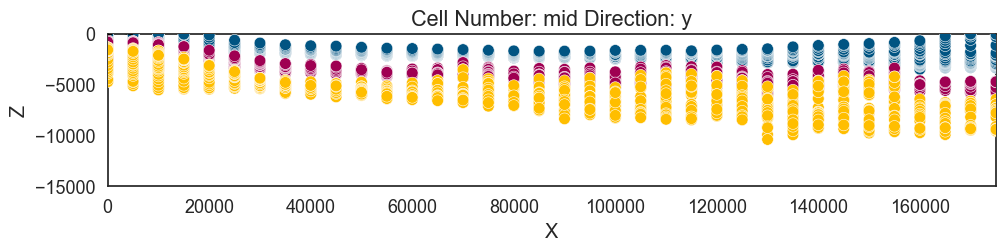

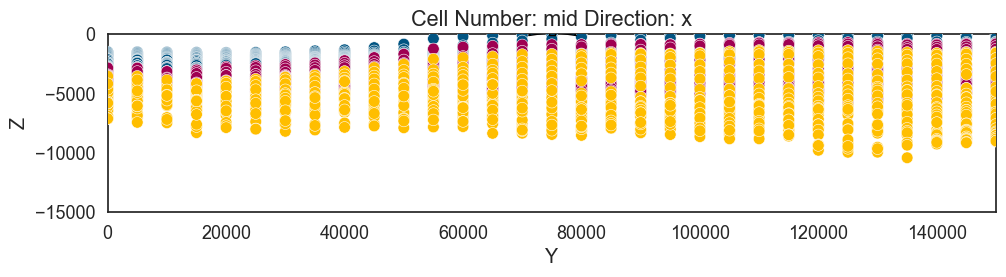

In [5]:
# Seção transversal do modelo
gp.plot_2d(geo_model, direction="y", show_data=True, show_lith=True, ve=2, legend=False)
gp.plot_2d(geo_model, direction="x", show_data=True, show_lith=True, ve=2, legend=False)
# gp.plot_2d(geo_model, direction="z", show_data=True, show_lith=True, ve=1, legend=False)

In [ ]:
# geo_model.set_default_orientation()

In [7]:
# Ver os dados em 3D
gpv = gp.plot_3d(
    geo_model,
    plotter_type="background",
    image=False,
    show_data=True,
    show_surfaces=True,
    show_scalar=True,
    show_boundaries=True,
    ve=5,
)

In [8]:
%%time
gp.set_interpolator(
    geo_model, 
    output=['geology'], 
    compile_theano=True, 
    theano_optimizer='fast_run', # fast_compile, fast_run
    dtype="float64",  # for model stability
    verbose=[]
)

Setting kriging parameters to their default values.
Compiling aesara function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                             values
range                230976.189249
$C_o$            1270238095.238095
drift equations             [3, 3]
CPU times: total: 18 s
Wall time: 19 s


In [9]:
%%time
gp.compute_model(
    geo_model, 
    compute_mesh=True,
    )

CPU times: total: 8min 2s
Wall time: 1min 23s



Lithology ids 
  [4.         4.         4.         ... 1.99999981 1.99987648 1.91695407] 

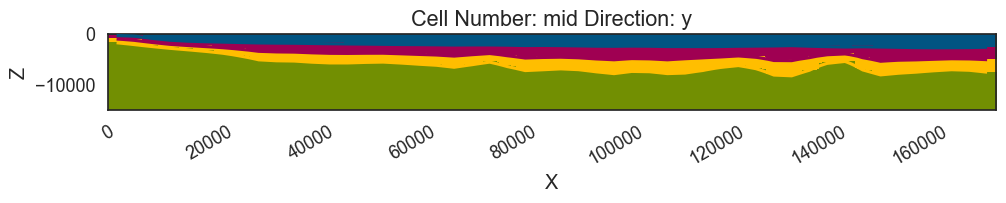

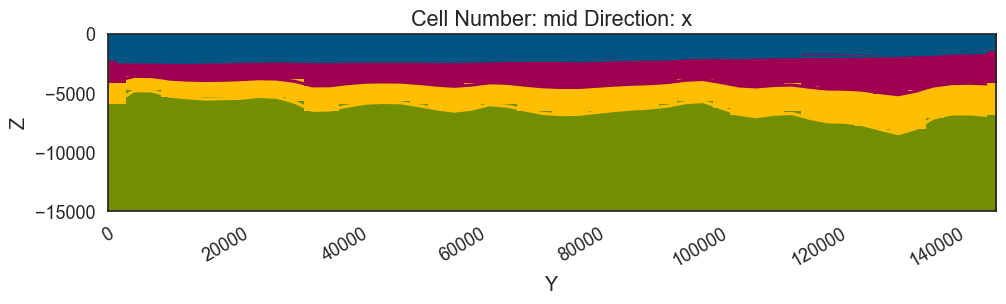

In [10]:
# Seção transversal do modelo
gp.plot_2d(
    geo_model,
    direction="y",
    show_data=False,
    show_lith=True,
    ve=1,
)
gp.plot_2d(
    geo_model,
    direction="x",
    show_data=False,
    show_lith=True,
    ve=2,
    legend=True,
)

In [11]:
# Ver os dados em 3D
gpv = gp.plot_3d(geo_model, image=False, plotter_type="background", show_data=False, ve=5)

In [ ]:
topo_init = tp.compute_topology(
    geo_model, direction="x", voxel_threshold=1
)  # , direction="Y", cell_number=15)
edges_init, centroids_init = tp.clean_unconformity_topology(
    geo_model, 1, topo_init[0], topo_init[1]
)

In [ ]:
# Seção transversal do modelo
gp.plot_2d(
    geo_model,
    direction="y",
    show_data=False,
    show_lith=True,
    ve=1,
)
gp.plot_2d(
    geo_model,
    direction="x",
    show_data=False,
    show_lith=True,
    ve=2,
    legend=True,
)

In [ ]:
# Seção transversal do modelo
gp.plot_2d(
    geo_model,
    direction="y",
    show_data=False,
    show_lith=True,
    ve=1,
)
gp.plot.plot_topology(geo_model, edges_init, centroids_init)

In [ ]:
# Salvar o modelo gerado em zip (contem todos os files relevantes para refazer o modelo)
gp.save_model(
    geo_model,
    path="../../../output/",
    compress=True,
)